# Health Insurance Charges Forecast 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('C:/Users/harshit/Desktop/Cureya/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Summary

In [3]:
df.iloc[:,[0,2,6]].describe()

,age,bmi,charges
count,159.000000,159.000000,159.000000
mean,38.088050,30.628239,13886.998518
std,14.580802,5.600807,12702.409580
min,18.000000,17.385000,1137.011000
25%,26.000000,26.552500,4141.688825
50%,36.000000,29.920000,10115.008850
75%,53.000000,35.145000,19040.137300
max,64.000000,49.060000,51194.559140


# Age Distribution

<AxesSubplot:xlabel='age', ylabel='Density'>

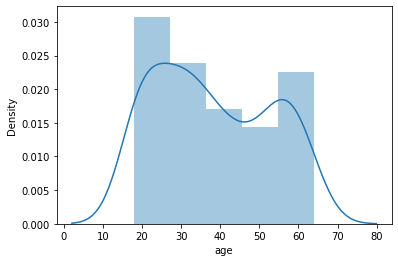

In [4]:
sns.distplot(df['age'])

# Age vs BMI

<AxesSubplot:xlabel='age', ylabel='bmi'>

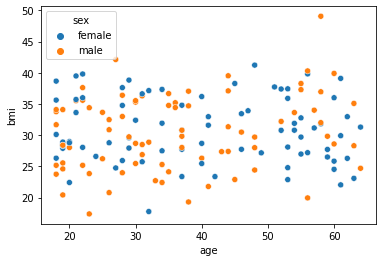

In [5]:
sns.scatterplot(x="age", y="bmi", hue='sex',data=df,color='red')

# Age Distribution - Smoker vs Non-Smoker

<AxesSubplot:xlabel='smoker', ylabel='age'>

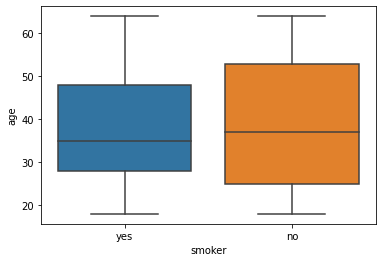

In [6]:
sns.boxplot(x='smoker',y='age',data=df)


Text(0.5, 1.0, 'Distribution of ages of non smoker')

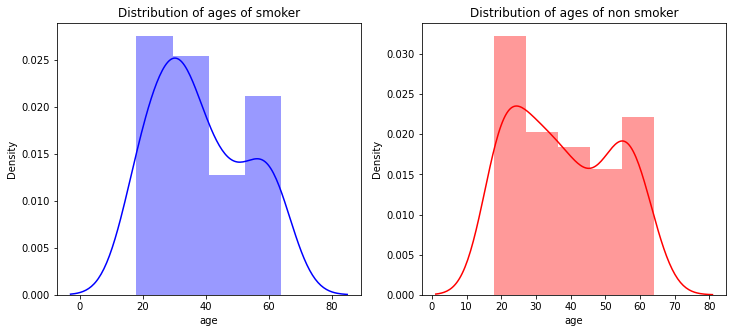

In [7]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 'yes')]["age"],color='blue',ax=ax)
ax.set_title('Distribution of ages of smoker')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 'no')]['age'],color='red',ax=ax)
ax.set_title('Distribution of ages of non smoker')

# Gender wise Smoker Count

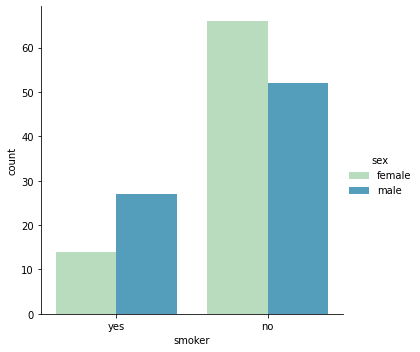

In [8]:
sns.catplot(x="smoker", kind="count",hue = 'sex',palette='GnBu',data=df)

# Cost Distribution - smokers vs non-smokers

<AxesSubplot:xlabel='smoker', ylabel='charges'>

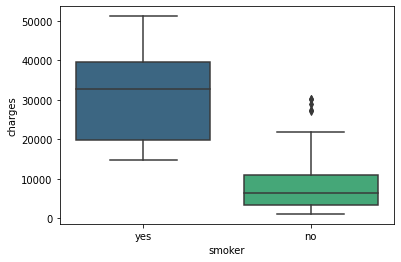

In [9]:
sns.boxplot(x='smoker',y='charges',palette='viridis',data=df)

Text(0.5, 1.0, 'Distribution of charges of non smoker')

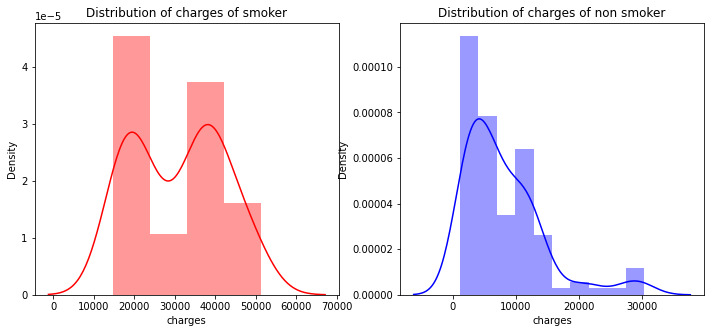

In [10]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 'yes')]["charges"],color='red',ax=ax)
ax.set_title('Distribution of charges of smoker')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 'no')]['charges'],color='blue',ax=ax)
ax.set_title('Distribution of charges of non smoker')

> Patients who smoke tend to incur higher insurance costs.

# Correlation Matrix

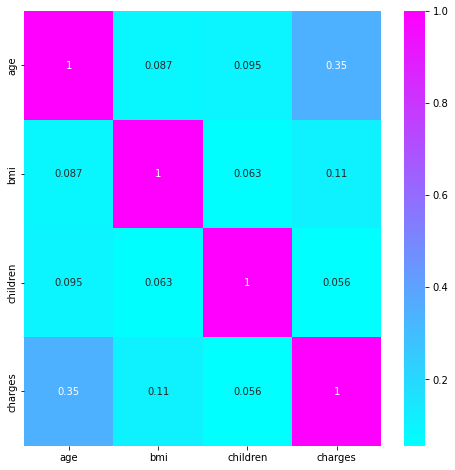

In [11]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

# Data Modelling and Evaluation

Taking Care of Missing Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       159 non-null    int64  
 1   sex       159 non-null    object 
 2   bmi       159 non-null    float64
 3   children  159 non-null    int64  
 4   smoker    159 non-null    object 
 5   region    159 non-null    object 
 6   charges   159 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 6.9+ KB


We clearly observe no null entries are present in the dataset.
Hence, no need to do anything. We can simply proceed further.

# Encoding Categorical Variables

In [13]:
df = pd.get_dummies(df, columns = ['sex','smoker','region'], drop_first = True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Train Test Split

In [14]:
X = df.loc[:,df.columns != 'charges'].values
y = df.loc[:,['charges']].values

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

# Linear Regression

(Score = 68.54%)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)

In [18]:
score = r2_score(y_test, y_pred) 
print(score)

0.68545404399288


# Polynomial Regression

(Score = 11.74%)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=2
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())

polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [20]:
y_pred = polyreg.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)

In [21]:
score = r2_score(y_test, y_pred) 
print(score)

0.11741097378005194


# Decision Tree Regression

 (Score = 69.54%)

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [23]:
y_pred = regressor.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)

In [24]:
score = r2_score(y_test, y_pred) 
print(score)

0.6954369748097585


# Random Forest Regression 

(Score = 83.06%)

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [26]:
y_pred = regressor.predict(X_test)

y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)

In [27]:
score = r2_score(y_test, y_pred) 
print(score)

0.8306787749948495


# Conclusion

Smoking has proven to be the biggest factor of high medical insurance costs. 

Age and BMI are other important factors.

Random Forest Regressor has turned out to be the best model, with a score of 83.06%.